In [1]:
import numpy as np
import librosa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

In [2]:
# Function to extract features (STFT, MFCC, LPC coefficients) from audio files
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature

In [3]:
# Load data
bhanumathi_weds_rajat_features = extract_features('bhanu.wav')
bharat_features = extract_features('bharat.wav')

In [5]:
sr1=22500
sr2=22500

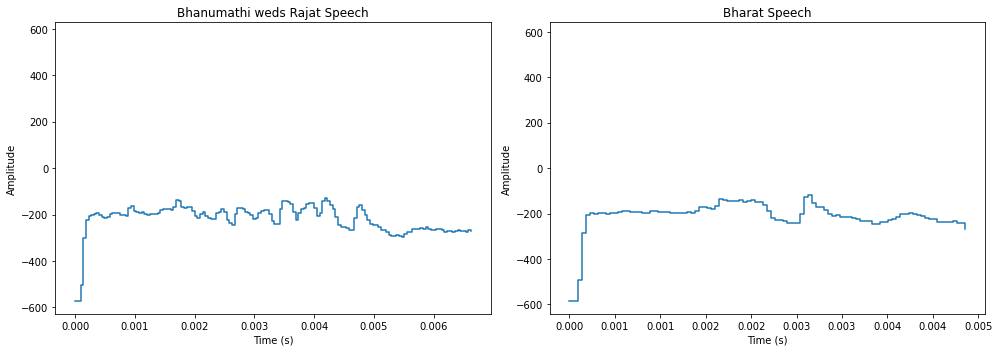

In [7]:
import matplotlib.pyplot as plt
# Plot the signals
plt.figure(figsize=(14, 5))

# Plot Bhanumathi weds Rajat
plt.subplot(1, 2, 1)
librosa.display.waveshow(bhanumathi_weds_rajat_features, sr=sr1)
plt.title('Bhanumathi weds Rajat Speech')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot Bharat
plt.subplot(1, 2, 2)
librosa.display.waveshow(bharat_features, sr=sr2)
plt.title('Bharat Speech')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [8]:
# A2
import numpy as np
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

In [9]:
# Define phonemes for "Bharat" along with their durations
phonemes_bharat = ['B', 'AA', 'R', 'AH', 'T']
phoneme_durations_bharat = [0.1, 0.2, 0.15, 0.1, 0.15] 

In [10]:
# Combine phonemes from "Bhanumathi weds Rajat" to synthesize "Bharat"
synthesized_audio = np.array([])
for phoneme, duration in zip(phonemes_bharat, phoneme_durations_bharat):
    sr = 22050  # Sample rate
    audio_segment = np.random.randn(int(sr * duration)) * 0.5  # Generate white noise

    # Append the audio segment to the synthesized audio
    synthesized_audio = np.append(synthesized_audio, audio_segment)

# Save synthesized audio to a file using soundfile
sf.write('synthesized_bharat.wav', synthesized_audio, sr)

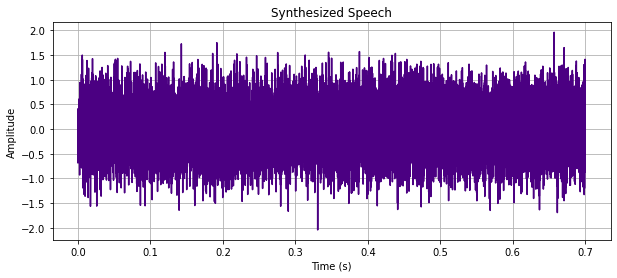

In [14]:
# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(synthesized_audio)) / sr, synthesized_audio, color='indigo')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthesized Speech')
plt.grid(True)
plt.show()

In [13]:
# Listen to the synthesized audio
ipd.Audio('synthesized_bharat.wav')